# [StudentLife](http://studentlife.cs.dartmouth.edu/)

## 1. 설명

다트머스 대학 학생들의 여러 생활들과 해당 학기의 GPA 성적이 들어있는 데이터다. 아래는 데이터의 컬럼들이고 Simple Linear Regression을 활용해서 그래프를 그려보겠다.

- 수면 시간 및 기상 시간 : `sleep_time`
- 하루 중 나누는 대화의 수와 시간
- 운동 (걷기, 앉아있기, 달리기, 서있기) : `exercise_activity`
- 학생의 위치 정보 (기숙사, 수업, 파티, 운동)
- 학생 주변에 있었던 사람들
- 스트레스 레벨 : `stress_level`
- 식습관
- `social_activity`
- 공부 시간: `study_time`


## 2. 구현

### 2.1 데이터

```
sleep_time study_time stress_level exercise_activity social_activity GPA
6.09589041096 292 2.41635687732 41 4.24050632911 3.519
5.125 54 1.84 11 2.125 3.719
7.92307692308 78 2.06666666667 24 2.8 3.505
.
.
.
```

### 2.2 라이브러리

In [1]:
from scipy.stats import linregress
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

`matplotlib.use('Agg')` 부분은 시각화 라이브러리가 결과물을 표현할 때 어떤 형식으로 할 것인지 정하는 것이다. `Agg`는 png 류의 이미지 파일로 출력한다는 의미고 `PDF`, `SVG`, `PS` 형태를 지정할 수도 있다.

### 2.3 데이터 읽기

In [2]:
def read_data(col_name):
    student_data = []
    
    with open('students.txt') as fp:
        columns = fp.readline().strip().split(' ')
        for line in fp:
            line_data = line.strip().split(' ')
            line_data_numeric = [float(x) for x in line_data]
            student_data.append(line_data_numeric)
    
    student_data = np.array(student_data)
    col_index = columns.index(col_name)
    
    # X must be numpy.array in (30 * 5) shape.
    # Y must be 1-dimensional numpy.array.
    X = student_data[:,col_index]
    Y = student_data[:,-1]
    return (X, Y)

- 데이터에서 특정 컬럼의 데이터만 GPA와 함께 가져오는 함수
- `students_data`에 하나의 라인을 한 행으로 해서 읽어와서 다 append한다.
- 만들어진 list를 np.array 형태로 바꾼다.
- X는 원하는 컬럼에 대한 모든 행이고, Y는 GPA 데이터다.

### 2.4 Linear regression

In [3]:
def do_linear_regression(X, Y):
    slope, intercept, r_value, p_value, std_err = linregress(X, Y)
    return (slope, intercept)

- `scipy.stats.linregress(X, Y)` : 데이터 X와 결과값 Y를 받아서 regression 결과를 리턴한다.
    + `slope`: 기울기 스칼라값. 타입은 float
    + `intercept`: y 절편 스칼라값. 타입은 float
    + `r_value`: variable이 얼마나 연관되어있는지 -1에서 1 사이의 값을 지닌다. 절대값이 클 수록 연관관계가 큰 것이고 양, 음의 상관관계 존재
    + `p_value`: p값
    + `std_err`: population(모집단)의 standard deviatation이 아니라 sampling ditribution에서의 standrd deviation. 즉 N으로 나눈 것이 아니라 N-1로 나눈 값

### 2.5 chart

In [4]:
def draw_chart(X, Y, slope, intercept, x_col):
    fig = plt.figure()
    fig.suptitle('Linear Regression for Class Data')
    ax = fig.add_subplot(111)
    ax.set_xlabel(x_col)
    ax.set_ylabel('GPA')
    
    plt.scatter(X, Y)
    
    min_X = min(X)
    max_X = max(X)
    min_Y = min_X * slope + intercept
    max_Y = max_X * slope + intercept
    plt.plot([min_X, max_X], [min_Y, max_Y], 
             color='red',
             linestyle='--',
             linewidth=3.0)
    
    ax.text(min_X, min_Y + 0.1, r'$y = %.2lfx + %.2lf$' % (slope, intercept), fontsize=15)
    plt.show()
    # plt.savefig('chart.svg')

- `fig = plt.figure()` : fig로 표 형태 결정
- `fig.suptitle('text')` : 맨 위 중앙에 위치할 제목 설정
- `ax = fig.add_subplot(111)` : 숫자는 비율을 의미하고 배경 색도 지정 가능하다. 구해진 ax로 x, y 축 레이블도 설정
- `plt.scatter(X, Y)` : 데이터를 가지고 산점도를 그린다.
- 아래 min, max 코드들은 X축 끝에서 끝까지 regression으로 구해진 slope, intercept로 선을 긋는 과정
- `ax.text(x, y, text, fontsize=15)` : x, y 좌표에 text를 더하는 것

### 2.6 실행

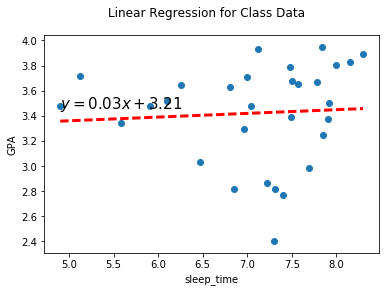

In [5]:
def main():
    '''
    사용 가능 컬럼
    sleep_time, study_time, stress_level, exercise_activity, social_activity
    '''
    x_col = 'sleep_time'
    
    (X, Y) = read_data(x_col)
    (slope, intercept) = do_linear_regression(X, Y)  # linear regression을 하는 함수
    draw_chart(X, Y, slope, intercept, x_col) # 그래프를 그리는 함수

if __name__ == "__main__":
    main()